### scikit-learn biblioteka

**scikit-learn** je Python bibloteka koja se specijalno koristi za zadatke mašinskog ucenja. **linear_model** je modul koji omogućava metode za rad sa linearnim modelima kao sto su linearna regresija, linearna regresija sa regularizacijama, logistička regresija, ... **model_selection** je modul koji raspolaže funkcionalnostima poput podele skupa podataka na skupove za treniranje i testiranje, unakrsne validacije, generisanja stratifikovanih skupova, ... **metrics** modul stavlja na raspolaganje različite metrike koje se mogu koristiti u evaluaciji. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

Nadalje ce biti posmatran problem linearne regresije sa modelom $f(x) = \beta_0 + \beta_1x$. 
<br>
Skup podataka sa kojim ćemo raditi će biti sintetički. Vrednosti atributa će biti podeoci ekvidistantne mreže na intervalu [1, 5], a vrednosti ciljne funkcije ce biti generisane po formuli $y = 10x + 2sin(x)$ uz dodatak šuma. 

In [2]:
# velicina skupa podataka
N = 100

In [3]:
# vrednosti ulaza
x = np.linspace(1, 5, N).reshape(N, 1)

In [4]:
# vrednosti ciljne funkcije
y = 11*np.sin(x) + 1.5* np.random.randn(N, 1)

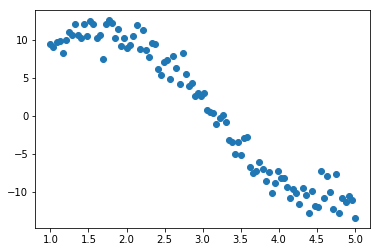

In [5]:
plt.plot(x, y, 'o')
plt.show()

In [6]:
# funkcija kojom je odredjen linearni model
def f(b0, b1, x):
    return b0+b1*x

In [8]:
model = linear_model.LinearRegression()

In [9]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size = 0.6, test_size = 0.4, random_state = 7)

In [10]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
b1 = model.coef_[0][0]
b1

-7.105452835643065

In [12]:
b0 = model.intercept_[0]
b0

21.703630243381973

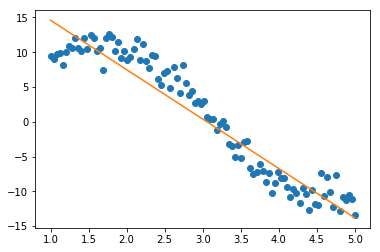

In [13]:
plt.plot(x, y, 'o')
plt.plot(x, f(b0, b1, x))
plt.show()

In [14]:
model.predict(23)

array([[-141.72178498]])

Evaluacija modela: 

In [15]:
y_predicted = model.predict(x_test)

In [16]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

7.8088803892642344

In [17]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

0.8933672701559836

Grafik reziduala modela služi za proveru pretpostavke o konstantnoj varijansi regresionog modela. Očekuje se da vrednosti koje su predviđene budu uređene po svojoj vrednosti duž *x* ose.

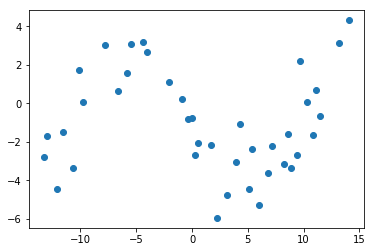

In [18]:
plt.plot(y_predicted, y_predicted-y_test, 'o')

### Algebarski pristup problemu linearne regresije

Potrebno je rešiti matričnu jednačinu $X^TX\beta=X^TY$ u kojoj je $X$ matrica podataka. Da bi se ovaj sistem rešio potrebno je izračunati Mur-Penrouzov inverz tj. matricu $(X^TX)^{-1}X^T$. Složenost izračunavanja inverza matrice je $O(N^3)$ gde je $N$ broj atibuta. Matrica $P=X(X^TX)^{-1}X^T$ se zove matrica predikcije jer proizvod $PX$ daje ocene ciljne promenljive Y.
<br>
<br>
Neke od osobina koje matrica predikcije ima: 
<br> 
* matrica je simetrična
* matrica je idempotentna tj. vazi PP = P

In [19]:
train_size = x_train.shape[0]
train_size

60

In [20]:
M = np.vstack([np.ones(train_size), x_train.ravel()]).transpose()

In [21]:
M.shape

(60, 2)

In [22]:
coef_pseudo = np.linalg.pinv(M).dot(y_train)

In [23]:
coef_pseudo.shape

(2, 1)

In [49]:
coef_pseudo

array([[21.70363024],
       [-7.10545284]])

In [24]:
coef_pseudo[0][0]

21.70363024338199

In [25]:
coef_pseudo[1][0]

-7.105452835643065

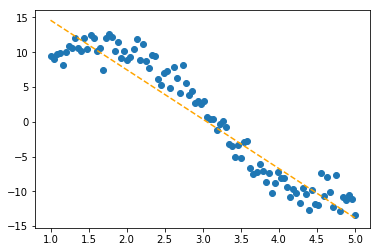

In [26]:
plt.plot(x, y, 'o')
#plt.plot(x, f(b0, b1, x), color='red')
plt.plot(x, f(coef_pseudo[0][0], coef_pseudo[1][0], x), color='orange', linestyle ='--')
plt.show()

Prilikom primena algebarskih metoda treba voditi računa o dimenzionalnosti problema i o uslovljenosti matrice podataka. 

In [27]:
x1 = np.random.randint(0, 20, 50)
x2 = np.random.randint(0, 5, 50)
x3 = 2*x1

x_train = np.vstack([np.ones(50), x1, x2, x3]).transpose()

In [28]:
np.linalg.cond(x_train)

1.849757126321447e+16

In [29]:
y_train = np.random.randint(0, 30, 50)

In [30]:
coef = np.linalg.pinv(x_train).dot(y_train)

In [31]:
coef

array([9.25291986, 0.0481894 , 0.1110756 , 0.0963788 ])

In [32]:
y_predicted = x_train.dot(coef)

In [33]:
metrics.mean_squared_error(y_train, y_predicted)

55.80640854254375

In [34]:
metrics.r2_score(y_train, y_predicted)

0.03628524507070319

In [35]:
# matrica kovarijanse
np.cov(x_train)

array([[ 3.02500000e+01,  9.32500000e+01, -1.25000000e+00, ...,
         2.34166667e+01,  7.11666667e+01,  4.07500000e+01],
       [ 9.32500000e+01,  2.88250000e+02, -4.25000000e+00, ...,
         7.24166667e+01,  2.21166667e+02,  1.25750000e+02],
       [-1.25000000e+00, -4.25000000e+00,  2.50000000e-01, ...,
        -1.08333333e+00, -3.83333333e+00, -1.75000000e+00],
       ...,
       [ 2.34166667e+01,  7.24166667e+01, -1.08333333e+00, ...,
         1.82500000e+01,  5.58333333e+01,  3.15833333e+01],
       [ 7.11666667e+01,  2.21166667e+02, -3.83333333e+00, ...,
         5.58333333e+01,  1.72333333e+02,  9.61666667e+01],
       [ 4.07500000e+01,  1.25750000e+02, -1.75000000e+00, ...,
         3.15833333e+01,  9.61666667e+01,  5.49166667e+01]])

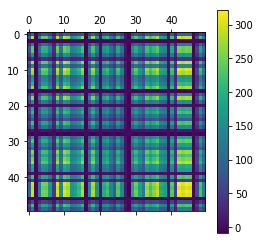

In [55]:
plt.matshow(np.cov(x_train))
plt.colorbar()

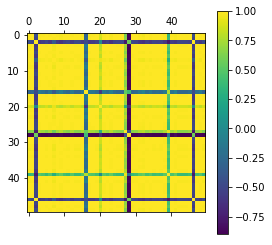

In [56]:
corr = np.corrcoef(x_train)
plt.matshow(corr)
plt.colorbar()

### Optimizacioni pristup problemu linearne regresije

Gradientni spust je optimizacioni metod kojim se iterativno dolazi do optimuma (minimuma ili maksimuma) funkcije. U slučaju minimizacije funkcije, prate se pravci gradijenta duž kojih vrednosti funkcije najviše opadaju. 
<br> 
Neka je $f(x)$ funkcija jedne pormenljive čiji se minimu traži i neka je $x_0$ proizvoljno odabrana tačka. Korak iteracije je određen sa $x_{k+1} = x_k - \alpha\nabla f(x_k)$ za $k=0,1,...$  Parametar $\alpha$ se naziva korak učenja. 
<br>
<br>
Važna pitanja u vezi sa gradijentnim spustom su: 
* Pod kojim uslovima uočeni algoritam konvergira?
* Na koji način se bira korak učenja?
* Kada zaustaviti algoritam? 
* Na koji način se bira početna tačka $x_0$?

In [36]:
def gradient_descent(f, grad, x, alpha, eps, max_iterations):
    result = {}
    
    x_old = x 
    for i in range(0, max_iterations):
        x_new = x_old - alpha*grad(x_old)
        if np.abs(f(x_new)-f(x_old))<eps:
            break;
        x_old = x_new
    
    result['converge'] = i != max_iterations
    result['number_of_iterations'] = i
    result['x_min'] = x_old
    
    return result

** Uvodni primer. ** 
<br>
Korišćenjem gradijentnog spusta odrediti minimum funkcije $f(x_1, x_2) = \frac{1}{2}(x_1^2 + 10x_2^2)$. 
<br>
Za korak učenja uzeti $\alpha = 0.1$, za preciznost uzeti $eps = 0.01$, a broj iteracija ograničiti na $1000$.  

In [37]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 0.5*(x1**2 + 10*x2**2)

In [38]:
def grad(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1, 10*x2])

In [39]:
x0 = (3, 5)
alpha = 0.1 
eps = 0.01 
max_iterations = 1000

In [40]:
result = gradient_descent(f, grad, x0, alpha, eps, max_iterations)

In [41]:
result

{'converge': True,
 'number_of_iterations': 22,
 'x_min': array([0.29543127, 0.        ])}

In [42]:
f_min = f(result['x_min'])

In [43]:
f_min

0.043639817840438584

In [44]:
result['number_of_iterations']

22

U kontekstu razmatranog problema linearne regresije, funkcija koja se minimizuje je funkcija greške. Minimizacija se radi po parametrima $\beta_0$ i $\beta_1$.

In [45]:
def error_function(beta, x, y):
    beta0 = beta[0]
    beta1 = beta[1]
    
    return 0.5*np.average((beta0 + beta1*x - y)**2)

In [46]:
def regression_gradient_descent(x, y, error_function, beta, alpha, eps, max_iterations, plot = False):
        
    result = {} 
        
    beta0_old = beta[0]
    beta1_old = beta[1]
    
    error_old = error_function((beta0_old, beta1_old), x, y)
    
    errors = np.empty(0);
    errors = np.append(errors, error_old)
    
        
    for i in np.arange(0, max_iterations):
            
        beta0_update = np.average(beta0_old + beta1_old*x -y)
        beta1_update = np.average((beta0_old + beta1_old*x -y)*x)
                
        beta0_new = beta0_old - alpha*beta0_update
        beta1_new = beta1_old - alpha*beta1_update
            
        error_new = error_function((beta0_new, beta1_new), x, y)
       
        
        if np.abs(error_new - error_old)<eps:
            break
                
        beta0_old = beta0_new
        beta1_old = beta1_new
        
        error_old = error_new
        
        errors = np.append(errors, error_new)
    
                
        
    result['converge'] = i != max_iterations
    result['number_of_iterations'] = i
    result['b_min'] = (beta0_old, beta1_old)
    
    if plot == True:
        plt.plot(np.arange(0, i+1), errors)
    
    return result
            

In [47]:
beta = (3, 1)

{'converge': True,
 'number_of_iterations': 360,
 'b_min': (22.05572405572349, -7.09842220754247)}

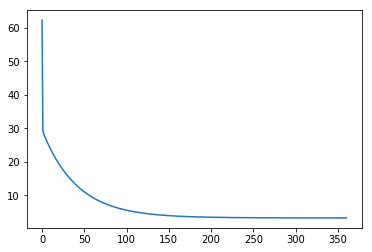

In [48]:
regression_gradient_descent(x, y, error_function, beta, alpha, 0.0001, max_iterations, plot=True)